# Notebook for ModelFlow 

In this example, we will show you how to generate question-answers (QAs) from give text strings using Google's models via uniflow.

### Before running the code

You will need to `uniflow` conda environment to run this notebook. You can set up the environment following the instruction: https://github.com/CambioML/uniflow/tree/main#installation.

Next, you will need a valid [Google API key](https://ai.google.dev/tutorials/setup) to run the code. Once you have the key, set it as the environment variable `GOOGLE_API_KEY` within a `.env` file in the root directory of this repository. For more details, see this [instruction](https://github.com/CambioML/uniflow/tree/main#api-keys)

### Update system path

In [29]:
%reload_ext autoreload
%autoreload 2

import sys

sys.path.append(".")
sys.path.append("..")
sys.path.append("../..")

## Import dependency

In [30]:
from dotenv import load_dotenv
from IPython.display import display

from uniflow.flow.client import TransformClient
from uniflow.flow.flow_factory import FlowFactory
from uniflow.flow.config  import TransformConfig
from uniflow.op.model.model_config  import GoogleModelConfig
from uniflow.viz import Viz
from uniflow.op.prompt import Context

load_dotenv()

True

### Display the different flows

In [31]:
FlowFactory.list()

{'extract': ['ExtractHTMLFlow',
  'ExtractImageFlow',
  'ExtractIpynbFlow',
  'ExtractMarkdownFlow',
  'ExtractPDFFlow',
  'ExtractTxtFlow'],
 'transform': ['TransformAzureOpenAIFlow',
  'TransformCopyFlow',
  'TransformGoogleFlow',
  'TransformHuggingFaceFlow',
  'TransformLMQGFlow',
  'TransformOpenAIFlow'],
 'rater': ['RaterFlow']}

### Prepare Sample Prompts
Here, we will use the following sample prompts from which to generate QAs.

In [32]:
raw_context_input = [
    "It was a sunny day and the sky color is blue.",
    "My name is Bobby and I am a talent software engineer working on AI/ML",
]

Next, for the given raw text strings `raw_context_input` above, we convert them to the `Context` class to be processed by `uniflow`.

In [33]:

data = [
    Context(context=c)
    for c in raw_context_input
]

### Use LLM to generate data
In this example, we use the base `Config` defaults with the GoogleModelConfig to generate questions and answers.

In [34]:
config = TransformConfig(
    flow_name="TransformGoogleFlow",
    model_config=GoogleModelConfig()
)
client = TransformClient(config)

Now we call the `run` method on the `client` object to execute the question-answer generation operation on the data shown above.

In [35]:
output = client.run(data)
output

100%|██████████| 2/2 [00:03<00:00,  1.65s/it]


[{'output': [{'response': ['question: What is the color of the sky?\nanswer: blue.'],
    'error': 'No errors.'}],
  'root': <uniflow.node.Node at 0x11180bfd0>},
 {'output': [{'response': ['question: What is your name?\nanswer: Bobby.'],
    'error': 'No errors.'}],
  'root': <uniflow.node.Node at 0x1118087c0>}]

### View the output

Let's take a look of the generated output.

In [36]:
output[0]['output'][0]

{'response': ['question: What is the color of the sky?\nanswer: blue.'],
 'error': 'No errors.'}

### Plot model flow graph
Here, we visualize the model flow graph for the `ModelFlow`.

In [37]:
graph = Viz.to_digraph(output[0]['root'])

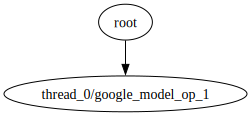

In [38]:
display(graph)

In [39]:
graph = Viz.to_digraph(output[1]['root'])

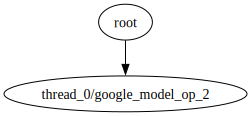

In [40]:
display(graph)